<a href="https://colab.research.google.com/github/masonstephen/AI-Coursework--2025/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

# Display the first 5 rows to confirm successful load
df.head()


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


Determine the number of rows and columns in the dataset.

In [5]:
rows, cols = df.shape
print(f"The dataset contains {rows} rows and {cols} columns.")


The dataset contains 5268 rows and 13 columns.


Display the last 75 rows in the dataset.

In [6]:
df.tail(75)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


Each column except the first one has some missing data. For each column, name
the most appropriate method for treating the missing data. Justify your choices.

In [7]:
# Display columns with missing values and their counts
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)

# Explanation / Justification
print("""
Suggested methods to treat missing data:
----------------------------------------
1. Date: Drop rows with missing dates (important for timeline accuracy).
2. Time: Fill missing with 'Unknown' since time may not always be recorded.
3. Location: Fill with 'Unknown' or nearest known region.
4. Operator: Fill with 'Unknown' since it’s categorical.
5. Aboard: Fill with median (numeric and skewed data).
6. Fatalities: Fill with 0 if confirmed no fatalities, else median.
7. Ground: Fill with 0 since missing may mean none affected.
8. Summary: Fill with 'No summary available' since it’s text.
""")


Missing values per column:
 Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Suggested methods to treat missing data:
----------------------------------------
1. Date: Drop rows with missing dates (important for timeline accuracy).
2. Time: Fill missing with 'Unknown' since time may not always be recorded.
3. Location: Fill with 'Unknown' or nearest known region.
4. Operator: Fill with 'Unknown' since it’s categorical.
5. Aboard: Fill with median (numeric and skewed data).
6. Fatalities: Fill with 0 if confirmed no fatalities, else median.
7. Ground: Fill with 0 since missing may mean none affected.
8. Summary: Fill with 'No summary available' since it’s text.



Create a new dataframe from the raw/uncleaned data called
‘fatality_locations’ with the following columns: ‘Date’,
‘Location’, ‘Aboard’, ‘Fatalities’.

In [8]:
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()

# Display first few rows to confirm creation
fatality_locations.head()


,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


Determine the date of the highest number of recorded fatalities from this new
dataframe.

In [9]:
max_fatalities = fatality_locations['Fatalities'].max()
deadliest_date = fatality_locations.loc[fatality_locations['Fatalities'] == max_fatalities, 'Date']
print(f"The highest number of recorded fatalities: {max_fatalities}")
print(f"Date(s) of this crash:\n{deadliest_date.values}")


The highest number of recorded fatalities: 583.0
Date(s) of this crash:
['03/27/1977']


Compare the number of passengers aboard to the number of fatalities per crash. Are
there any recorded crashes where there were no fatalities? If so, how many?

In [10]:
no_fatality_crashes = fatality_locations[fatality_locations['Fatalities'] == 0]
num_no_fatality = len(no_fatality_crashes)

print(f"Number of crashes with no fatalities: {num_no_fatality}")


Number of crashes with no fatalities: 58


In the ‘fatality_locations’ dataframe, the location column has data items
represented as ‘Region, U.S. State/Country’. Split this column to have two columns
of regions and states/countries.

In [11]:
fatality_locations[['Region', 'State/Country']] = fatality_locations['Location'].str.split(',', n=1, expand=True)

# Clean spaces
fatality_locations['Region'] = fatality_locations['Region'].str.strip()
fatality_locations['State/Country'] = fatality_locations['State/Country'].str.strip()

fatality_locations.head()


,Date,Location,Aboard,Fatalities,Region,State/Country
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0,Fort Myer,Virginia
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0,AtlantiCity,New Jersey
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0,Victoria,"British Columbia, Canada"
3,09/09/1913,Over the North Sea,20.0,14.0,Over the North Sea,None
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0,Near Johannisthal,Germany


Order the dataframe by the number of fatalities from highest to lowest and select the
first 100.

In [12]:
top_100_fatalities = fatality_locations.sort_values(by='Fatalities', ascending=False).head(100)
top_100_fatalities


,Date,Location,Aboard,Fatalities,Region,State/Country
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,Tenerife,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,Mt. Osutaka,"near Ueno Village, Japan"
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,Near Charkhidadri,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,Near Ermenonville,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,AtlantiOcean,110 miles West of Ireland
...,...,...,...,...,...,...
4852,04/15/2002,"Busan, South Korea",166.0,128.0,Busan,South Korea
3198,01/21/1980,"Elburz Mtns., near Laskarak, Markazi, Iran",128.0,128.0,Elburz Mtns.,"near Laskarak, Markazi, Iran"
1701,12/16/1960,"Staten Island / Brooklyn, New York",128.0,128.0,Staten Island / Brooklyn,New York
5108,07/09/2006,"Irkutsk, Russia",203.0,128.0,Irkutsk,Russia


. Generate a pie chart that shows the distribution of the top 25 number of fatalities
per country/U.S. State. [Hint: charts can be generated from the seaborn library]

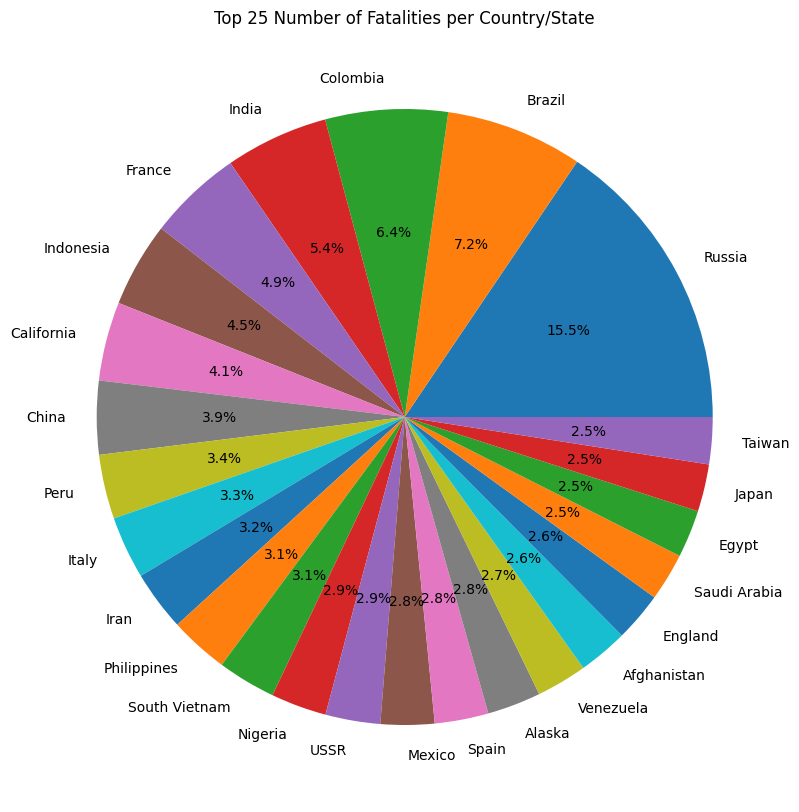

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by country/state and sum fatalities
fatalities_by_country = fatality_locations.groupby('State/Country')['Fatalities'].sum().sort_values(ascending=False).head(25)

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(fatalities_by_country, labels=fatalities_by_country.index, autopct='%1.1f%%')
plt.title("Top 25 Number of Fatalities per Country/State")
plt.show()


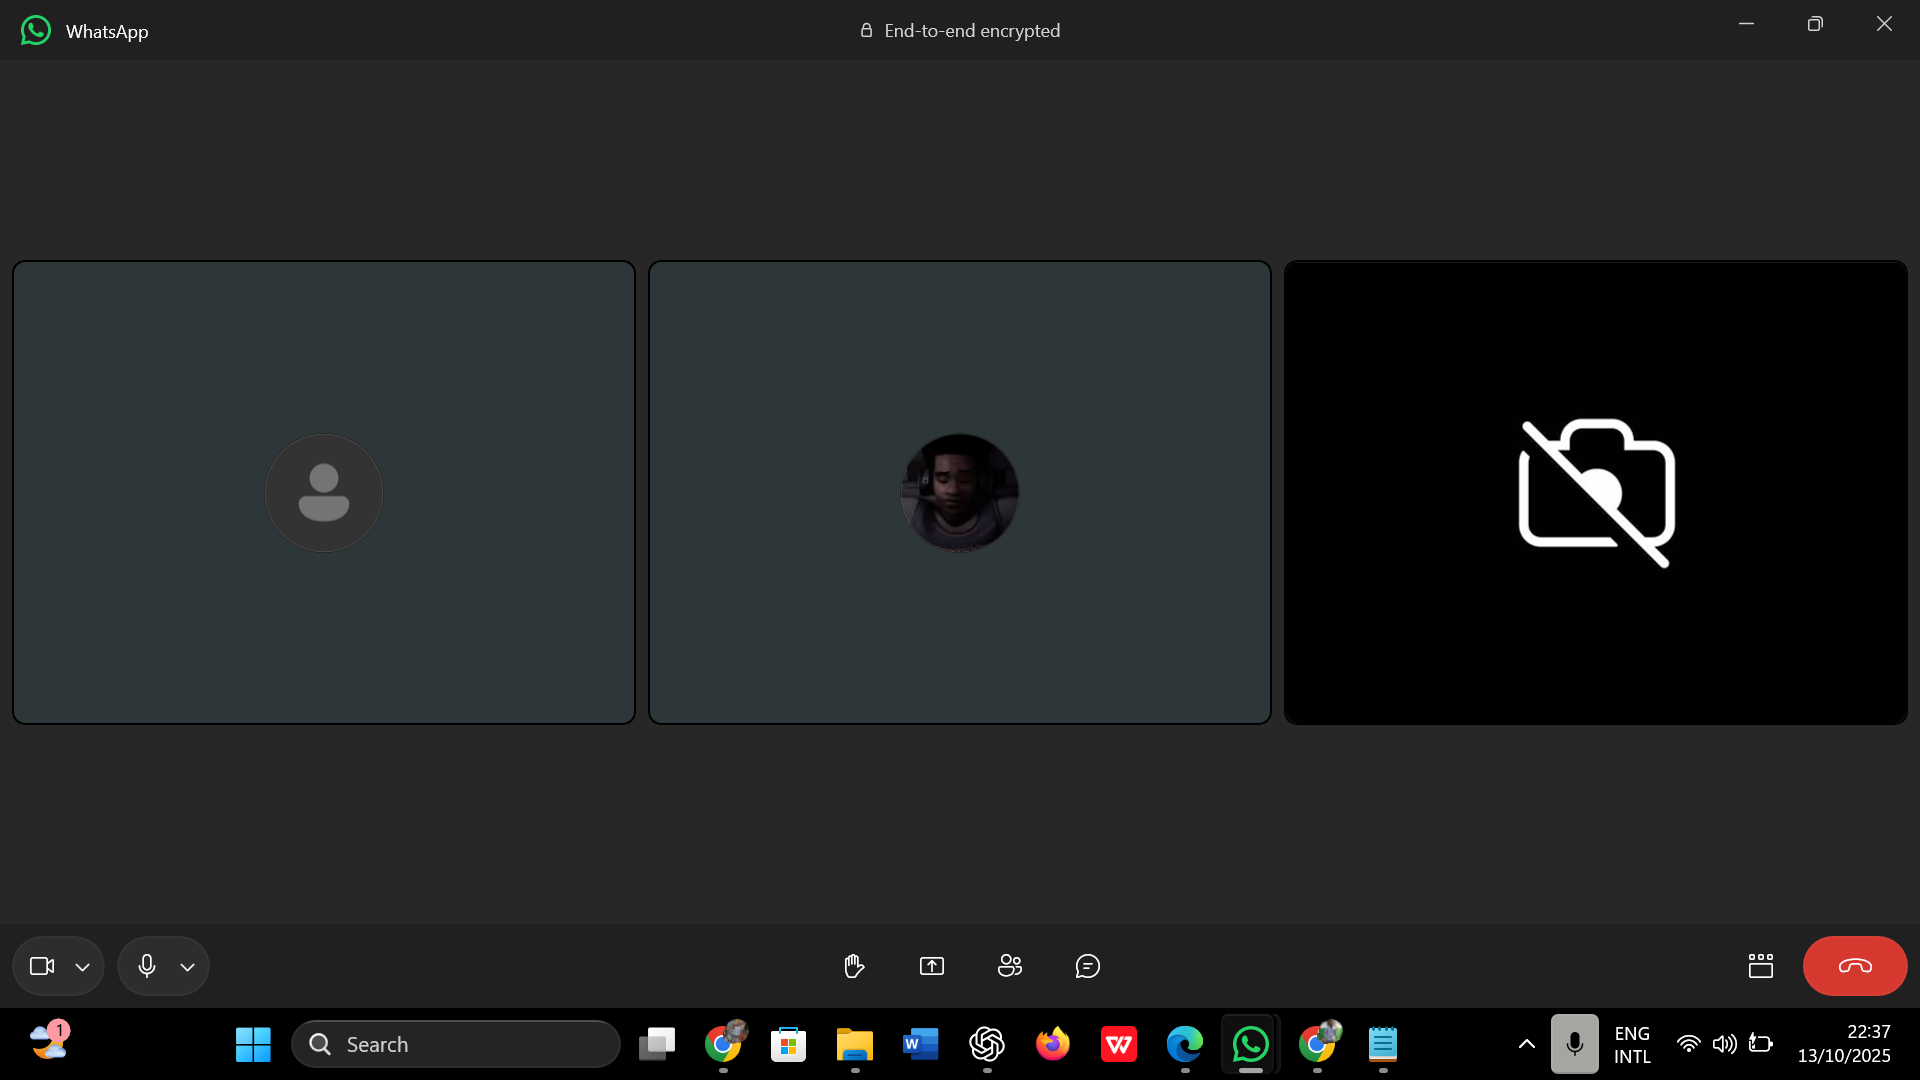